##Agenda

- In this post read,we will explain how forward and backward propagation is carried out in a CNN from scratch, using numpy and scipy (for mathematical operations) to classify Images from the MNIST dataset. The implementation is completely CPU based, so we could expect this implementation to be slower than an equivalent implementation using Keras.

### About MNIST dataset:


- MNIST is a dataset consisting of 70,000 black-and-white images of handwritten digits.
- Each image is 28 x 28 (= 784) pixels.
- Total of 10 classes (numbers from 0 to 9)
- Each pixel is encoded as an integer from 0 (black) to 255 (white):
  - the lower the pixel value, the darker the color.   
  - 60,000 images are used as train set and 10,000 as test set.


  <center>  <img src='https://drive.google.com/uc?id=1zLPt6sTQ1HGn3q1jywjOrJs-73QO2BYY' height=230></center>

In [ ]:
#Importing required Modules
import random
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils

## Overview of CNN Model :
   - That we are going to build from Scratch

<center>  <img src='https://drive.google.com/uc?id=1Tttc9HtqZwfHsFYWDUdhH0pUpxp7J_AK' height=500></center>




Defining our Base class Layer to specify the default layer properties that will be inherited to our Convolutional, Reshape, MaxPool, activation classes which will be derived from the Layer class.
<br> The Layer class has two attributes:
* forward : which takes in the input to the layer and returns the output via specified calculation for each layer
* backward : which takes in the output gradient to update the layer's parameters and return the input gradient

In [ ]:
#Base layer class to specify the Layer properites for our Reshape and Convolution Layer to inherit
class Layer:
    def __init__(self):
        self.input = None
        self.output = None
    def forward(self, input):
        # TODO: return output
        pass

    def backward(self, output_gradient, learning_rate):
        # TODO: update parameters and return input gradient
        pass

## Forward propagation in CNN

- Forward propagation is simply feeding the data in the forward direction to the model or neural network.
- Like in our case, each of our training images is processed through the-
  - convolution, activation, pooling, reshape, Dense layers.


### Convolutional Layer

- The convolutional class inherits from our base Layer class and takes input parameters   
 - input_shape,
 - kernel_size and
 - depth/numer of kernels/filters) for our layer.


Defining & Initializaing the input & output shapes of input_image, kernel_size & bias:





In [ ]:
class Convolutional(Layer):
    def __init__(self, input_shape, kernel_size, depth):
        #Input_shape is 3 dimensional (dxhxw), input depth representing no. of image input channels, input_height = image height and input_width = image width
        input_depth, input_height, input_width = input_shape
        #Depth represents the number of kernels of our convolutional layer
        self.depth = depth
        self.input_shape = input_shape
        #Number of channels in the image, i.e. 3 in a RGB image, 2 in a grayscale image
        self.input_depth = input_depth
        #Calculating our conv. layer output of 3 dimensions, first dim = number of filters/kernels,
        #second dim = height of the output matrix after applying convolution i.e input image height - kernel size + 1 by rule
        self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)
        #Kernels shape specifies the shape of the kernels produced, 4 dimensions depth = no. of kernels, input_depth = image channels, kernel_size = kernel dimension
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
        #Initalizing the Kernels weights randomly
        self.kernels = np.random.randn(*self.kernels_shape)
        #Initializing the biases randomly
        self.biases = np.random.rand(*self.output_shape)


    def forward(self, input):
        pass
        #TODO

    def backward(self, output_gradient, learning_rate):
        pass
        #TODO


- After taking in these parameters, the Convolutional layer processes the inputs through our forward and backward functions while training our model.






#### Forward propagation in Convolution layer?

- The forward function iterates through every filter in every image channel and
 - it pass over a kernel of specified size over the image and
 - perform the convolution operation between the kernels and the input image.

 <center>  <img src='https://drive.google.com/uc?id=1PPy9sjvh36qktkqeFnB-WBiNj3ZPNufU' width=500 height=190></center>
- Forward propagation mathematically for the *Convolutional Layer* is as follows:


<center>  <img src='https://drive.google.com/uc?id=1vMgkDBw6pRwdLA7J-gZ_mFG9Frytkd2Z' width=500 height=80></center>

- where Y is the output of our convolutional operation which is equal to the Bias plus the sum of cross-correlations between the input image (Xᵢ) and our convolution kernel/filter (Kᵢⱼ), represented by * .
- This equation is implemented to calculate output through every step of our convolutional operation till every image is applied the convolutional operation for the depth / number of kernels of the layer  
   
  - Expanding the equation, we get:

<center>  <img src='https://drive.google.com/uc?id=1fsFbtbIIIGfBY_3fD9itb_fwD3qGE76z' width=500 height=200 width=150></center>
where d is the depth/number of filters and n is the input depth.
<br>


- By using these equations, we pass the filters with their weights over the image matrix, to compute the output of the convolutional layer.


Here we perform the convolution operation using correlate2d() method of scipy library

In [ ]:
class Convolutional(Layer):
    def __init__(self, input_shape, kernel_size, depth):
        #Input_shape is 3 dimensional (dxhxw), input depth representing no. of image input channels, input_height = image height and input_width = image width
        input_depth, input_height, input_width = input_shape
        #Depth represents the number of kernels of our convolutional layer
        self.depth = depth
        self.input_shape = input_shape
        #Number of channels in the image, i.e. 3 in a RGB image, 2 in a grayscale image
        self.input_depth = input_depth
        #Calculating our conv. layer output of 3 dimensions, first dim = number of filters/kernels,
        #second dim = height of the output matrix after applying convolution i.e input image height - kernel size + 1 by rule
        self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)
        #Kernels shape specifies the shape of the kernels produced, 4 dimensions depth = no. of kernels, input_depth = image channels, kernel_size = kernel dimension
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
        #Initalizing the Kernels weights randomly
        self.kernels = np.random.randn(*self.kernels_shape)
        #Initializing the biases randomly
        self.biases = np.random.rand(*self.output_shape)

    #Forward pass, takes input and computes the output by applying the above convolution
    def forward(self, input):
        self.input = input
        #Inititialize output matrix with output_shape
        self.output = np.zeros(self.output_shape)

        #Two nested for loops for first traversing all filters (depth), then all channels (input_depth) in every input image
        for i in range(self.depth):
            for j in range(self.input_depth):
               #Output is calculated by adding the biases of the layer with the Cross Correlation
               #between image and the kernel,valid stands for no padding
                self.output[i] += self.biases[i] + signal.correlate2d(self.input[j], self.kernels[i, j], "valid")

        return self.output

    def backward(self, output_gradient, learning_rate):
        pass
        #TODO


#### How Backpropagation works in Convolution ?

Recall what is backpropagation ?
- Backward Propagation refers to updating the weights and biases of our model with respect to the loss of our model.

####In case of Convolution:

- The parameters that we need to update -
    -  kernels ,inputs and biases
- For updating the kernels and biases we need to compute their gradients,
- From the forwardpropagation we have the derivative of the error from which we will compute:

  - Derivative of L (error of the network) with respect to kernels (K) and biases of the layer (B)
  - Derivative of L with respect to the input (X)

<center>  <img src='https://drive.google.com/uc?id=1kqs8v_XjGAhKw26TxLyyBloHy_x-bKVt' height=350 width=575></center>


#### 1. Kernel updates:

- The Image below depicts the computation of the derivative of the Loss (L) with respect to the Kernels (K)




<center>  <img src='https://drive.google.com/uc?id=1oFv2vJeWr2_nhzVjitfs7OyQHkoCAeJr' height=350></center>

<center>  <img src='https://drive.google.com/uc?id=1XI9J7oo0a6lHHFgRumOst_WZZ6QNB7Yz' height=350 width=575></center>

<br>

#### 2. Bias updates:

Then we Calculate the derivative of L (error of the network) with respect to the bias of the layer as follows:

<center>  <img src='https://drive.google.com/uc?id=1Wj-yxhihBkzr2qk5QMojiApWY7JnWw9a' height=350 width=575></center>


#### 3. Input updates:

- The derivative of L (error of the network) with respect to the Input of the layer as follows:

<center>  <img src='https://drive.google.com/uc?id=1iGEPp7nc1eTHY58CjVe1bzFgZBi5GzfI' height=350 width=575></center>


<center>  <img src='https://drive.google.com/uc?id=1M3CzI9KnCgJG-1_RfJK9Ya15PqH8iLDI' height=350 width=575></center>

<br><br>Now let's understand how this works<br>

<center>  <img src='https://drive.google.com/uc?id=11VhVh2zqmHXIkaUP-sZ3Bi9fryNd__CU' height=500></center>

- This depicts that the input gradient i.e. derivative of Loss w.r.t. to the input is equal to the output gradient i.e. derivative of Loss w.r.t. the output gradient fully cross-correlated (* symbol) with the 180 degress rotated kernel.

- This concludes that the input gradient is equal to the output gradient fully convolved with the kernel






**Quiz 1** :

  1.  **How can we calculate the gradients to update Kernel weights in Convolutional Layer during Backpropagation ?**<br>

    A) Calculating derivative of image pixels with respect to kernel weights<br>
    B) Calculating derivative of loss with respect to kernel weights <br>
    C) Calculating the derivative of kernels with respect to bias<br>
    D) Calculating the derivative of input with respect to loss<br>
<br>

**Solution** :

B)

- We calculate the gradients of the loss function by computing the derivative (Loss/output) with the help of the derivative (Loss/Kernels)
$\frac{\partial Loss}{\partial {w_i}}$, derivative (Loss/Bias) $\frac{\partial Loss}{\partial {b_i}}$and derivative (Loss/Input)$\frac{\partial Loss}{\partial {X_i}}$

- We update the kernels and the biases of our convolutional layer by subtracting the kernels gradients and output gradient w.r.t. the learning rate


In [ ]:
class Convolutional(Layer):
    def __init__(self, input_shape, kernel_size, depth):
        #Input_shape is 3 dimensional (dxhxw), input depth representing no. of image input channels, input_height = image height and input_width = image width
        input_depth, input_height, input_width = input_shape
        #Depth represents the number of kernels of our convolutional layer
        self.depth = depth
        self.input_shape = input_shape
        #Number of channels in the image, i.e. 3 in a RGB image, 2 in a grayscale image
        self.input_depth = input_depth
        #Calculating our conv. layer output of 3 dimensions, first dim = number of filters/kernels,
        #second dim = height of the output matrix after applying convolution i.e input image height - kernel size + 1 by rule
        self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)
        #Kernels shape specifies the shape of the kernels produced, 4 dimensions depth = no. of kernels, input_depth = image channels, kernel_size = kernel dimension
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
        #Initalizing the Kernels weights randomly
        self.kernels = np.random.randn(*self.kernels_shape)
        #Initializing the biases randomly
        self.biases = np.random.rand(*self.output_shape)

    #Forward pass, takes input and computes the output by applying the above convolution
    def forward(self, input):
        self.input = input
        #Inititialize output matrix with output_shape
        self.output = np.zeros(self.output_shape)

        #Two nested for loops for first traversing all filters (depth), then all channels (input_depth) in every input image
        for i in range(self.depth):
            for j in range(self.input_depth):
                #Output is calculated by adding the biases of the layer with the Cross Correlation between image and the kernel, valid stands for no padding in our correlation calculation inputs
                self.output[i] = self.biases[i]+ signal.correlate2d(self.input[j], self.kernels[i, j], "valid")

        return self.output

    def backward(self, output_gradient, learning_rate):
        #Intializing the gradient of the kernels as zeros
        kernels_gradient = np.zeros(self.kernels_shape)
        #Intializing the gradient of the input as zeros
        input_gradient = np.zeros(self.input_shape)

        #Nested for loop for updating the gradients first traversing all filters (depth), then all channels (input_depth) in every input image to update the gradients of kernels and inputs
        for i in range(self.depth):
            for j in range(self.input_depth):
                #Calculate kernels gradient in every i and j index in the kernel, compute correlation between image and output graident
                kernels_gradient[i, j] = signal.correlate2d(self.input[j], output_gradient[i], "valid")
                #Calculate input gradient by sliding the kernel on the output gradient matrix
                input_gradient[j] += signal.convolve2d(output_gradient[i], self.kernels[i, j], "full")

        #Update the kernels and biases w.r.t. learned features (stored in gradients)
        #Gradients are multiplied with the learning rate to update the kernels and biases
        self.kernels -= learning_rate * kernels_gradient
        self.biases -= learning_rate * np.sum(output_gradient)

        return input_gradient

### Activation Functions:

We have used majorly 3 activation functions (ReLU, TanH and Softmax) in our CNN model architecture which are explained below:

In **Backpropagation** of all activations, we apply the backward function of the activation on the input.

=> The Gradients of the previous layer are multiplied with the Layer Input on which we apply the activation function.

In [ ]:
#Base Activation class to specify the default properties of the Activation Layer from which we will derive our Activation functions ReLU, Softmax, TanH
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        #Calculation for the activation function
        self.activation = activation
        #Calculation for derivative of activation function which will be handy while backpropagation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        #Implement the backward function for the activation, by multiplying the output gradient and the derivative of the loss
        return np.multiply(output_gradient, self.activation_prime(self.input))

#### ReLU

The ReLU activation activation works on a simple principle.

- If the input value is less than zero, the output is zero

- else if the input value is greater than or equal to zero, the output is same is as input value
<br>

 ReLU introduces non-linearity to our CNN and helps in over-reliability of the network on some features as it drops neurons non-linearly.

<br>

<center>  <img src='https://drive.google.com/uc?id=1LXb4on8enumLbbv1ZOfs0mQNytPOtF3a' width=220 height=80></center><br>

During **Backpropagation**, the ReLU activation works as follows :<br> <br>
The ReLU function is defined as: <br>

<center>  <img src='https://drive.google.com/uc?id=1HyqadM9ED4XhVt-B-HGMIom8VHlOybYR' height=270></center><br>

For $x > 0$ the output is $x$, i.e. $f(x) = max(0, x)$

Derivative of $f(x)$ = $f'(x)$ : if $x < 0$, output is $0$. if $x > 0$, output is 1.

The derivative $f '(0)$ is not defined. So it's usually set to $0$.<br>

<center>  <img src='https://drive.google.com/uc?id=1-oxuuaM6wpI_kr3Dtz_Lnwp-YySI9eBn' width=220 height=80></center><br>


Code representation of the above calculation can be represented as :
<pre>def relu_prime(x):
   return np.where(x <= 0, 0, 1)</pre>


In [ ]:
class ReLU(Activation):
  def __init__(self):
        def relu(x):
            return np.where(x > 0, x, 0)

        def relu_prime(x):
            return np.where(x <= 0, 0, 1)

        super().__init__(relu, relu_prime)

#### TanH

The TanH activation function takes any input value and outputs the value in the range -1 to 1


- The greater the input value, the closer the output value will be equal to 1


- The smaller the input, the closer the output value will be to -1

<center>  <img src='https://drive.google.com/uc?id=1MqSgrbLwMz7u3G7LowITwHDMVHeDaKok' height=240></center>

By practice, the TanH activation function is used when we want our modle to converge quickly with a greater value of learning rate which results in higher values of gradients during training, therefore making our model converge faster with a good accuracy roven over time.

<center>  <img src='https://drive.google.com/uc?id=1eCuIjpRCGlldmP98l1Ubk1nCXiTlquFv' height=110 width=200></center>


In **Backpropagation** of TanH activation, we calculate the gradients for tanh by computing the derivative of TanH function.

Calculating the gradient for the tanh function also uses the quotient rule:

<center>  <img src='https://drive.google.com/uc?id=1tJNVaouljjOEykAD4L9aWFwsE7YNrdaf' height=240></center>

The derivative of tan(x) is therefore, `1 - np.tanh(x) ** 2`, which we have implemented using np.tanh in the code cell below





In [ ]:
class TanH(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)

        def tanh_prime(x):
            return 1 - np.tanh(x) ** 2

        super().__init__(tanh, tanh_prime)

#### Softmax

the Softmax activation function is generally used as last layer in a neural network



- softmax converts the Dense's layer (classifcation layer) outputs to a probability map such that the sum of the outputs is equal to 1



- Softmax is used in classfication problems, like in our case where the number of classes is 2

<br>


<center>  <img src='https://drive.google.com/uc?id=17s1wV-Jl2hFMGmOIZ0Ri38Znp0Jo8aiy' height=160></center>


**Backpropagation**

During the backward pass, a softmax layer receives a gradient, the partial derivative of the loss with respect to its output values.


<br>

To use the softmax function in neural networks, we need to compute its derivative. If we define $\Sigma_C = \sum_{d=1}^C e^{z_d} \, \text{for} \; c = 1 \cdots C$ so that $y_c = e^{z_c} / \Sigma_C$, then this derivative ${\partial y_i}/{\partial z_j}$ of the output $\mathbf{y}$ of the softmax function with respect to its input $\mathbf{z}$ can be calculated as:
<br><br>

<center>  <img src='https://drive.google.com/uc?id=1hXYwgq4FyXnYK0rwG7o4FjpRYELUNZUM' height=90></center>

The first part of this expression propagates the softmax values down the diagonal, and then we calculate the product of softmax values with respect to input.


In [ ]:
class Softmax(Layer):
    def forward(self, input):
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output

    def backward(self, output_gradient, learning_rate):
        n = np.size(self.output)
        return np.dot((np.identity(n) - self.output.T) * self.output, output_gradient)


### MaxPooling Layer

The MaxPool layer selects the maximum pixel values for every image in a particular kernel area.
<br>

<center>  <img src='https://drive.google.com/uc?id=1Wv3mBlveedhmRROXun8Bd8hZVZJ5RqLo' width=400></center>

Forward propagation:

- We Select the maximum value out of a given kernel area in an Input Image, the filter slides over our image w.r.t. given stride.

<center>  <img src='https://drive.google.com/uc?id=1RliqXph1H-XNH0chWnSqZJLwqZiIQPmO' width=400></center>

Backward propagation:

- For the backward propagation, we have to select only the elements in our input matrix that were selected during the forward propagation of the maxpool layer, zeroing out all the other indices that were not selected during forward propagation.

- In other words the gradient with respect to the input of the max pooling layer will be a matrix of zeros except on the places that was selected during the forward propagation.

<center>  <img src='https://drive.google.com/uc?id=1D27c4xmPb7nHF5_KDXY1GveeoOs9Yy1y' width=400>






**Quiz 2** :


**Which of the following is true about MaxPooling Layer** ?

A) MaxPooling layer does not have any trainable parameters<br>
B) MaxPooling layer helps in reducing computation<br>
C) In MaxPooling we take the highest pixel value inside the kernel window<br>
D) All of the above

Solution :<br>
D)

- MaxPooling and AveragePooling layers does not perform any learning and are only used for down-sampling the data
- Since max pooling is reducing the resolution of the given output of a convolutional layer, it reduces the amount of parameters in the network and consequently reduces computational load.
- Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter.


In [ ]:
class MaxPool(Layer):
    def __init__(self, input_shape, kernel_size, depth, stride):
        #Input_shape is 3 dimensional (dxhxw), input depth representing no. of image input channels, input_height = image height and input_width = image width
        input_depth, input_height, input_width = input_shape
        #Specifying the shape of input
        self.input_shape = input_shape
        #Specfiying the kernel size of our MaxPool operation
        self.kernel_size = kernel_size
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
        #Specifying the depth/no. of filters
        self.depth = depth
        #Specifying the depth/channels of our input
        self.input_depth = input_depth
        #initializing the kernels with random values of shape (kernels_shape)
        self.kernels = np.random.randn(*self.kernels_shape)
        self.stride = stride
        self.input_height, self.input_width = input_height, input_width

    #forward method to perform the MaxPool operation on the input
    def forward(self, input):
        self.input = input

        KH = 1 + (self.input_height - self.kernel_size) // self.stride
        KW = 1 + (self.input_width - self.kernel_size) // self.stride
        self.output = np.zeros((self.input_depth, KH, KW))

        for depth in range(self.input_depth):
            for r in range(0, self.input_height-1, self.stride):
                for c in range(0, self.input_width-1, self.stride):
                    self.output[depth, r//self.stride, c//self.stride] = np.max(self.input[depth, r:r+self.kernel_size, c:c+self.kernel_size])

        return self.output

    def backward(self, output_gradient, learning_rate):
        self.output_gradient = np.zeros(self.input_shape)
        # Intialize gradient of our layer
        dx = np.zeros(self.input_shape)
        # nested for loops for first traversing all filters (depth), then traversing the height and width of the image
        for depth in range(self.input_depth):
            for r in range(0, self.input_height-1, self.stride):
                for c in range(0, self.input_width-1, self.stride):
                    grad_pool = self.output[depth, r*self.stride:r*self.stride+self.kernel_size, c*self.stride:c*self.stride+self.kernel_size]
                    mask = (grad_pool == np.max(grad_pool))
                    dx[depth, r*self.stride:r*self.stride+self.kernel_size, c*self.stride : c*self.stride+self.kernel_size] = mask*self.output_gradient[depth, r, c]

        return dx

### Reshape Layer or Flattening

- To reshape arrays inorder to pass through dense layers
- The Reshape layer is used to reshape the dimenions of an input array to a desired compatible shape using the numpy.reshape function </br>
- For example we may reshape an array of size (5, 4, 1) to a size of (20, 1) using numpy.reshape

In [ ]:
class Reshape(Layer):
    def __init__(self, input_shape, output_shape):
    #Specify input shape and out shape in the constructor
        self.input_shape = input_shape
        self.output_shape = output_shape

    #Forward reshapes the input to the output shape
    def forward(self, input):
        return np.reshape(input, self.output_shape)

    #Backward reshapes the output to the input shape
    def backward(self, output_gradient, learning_rate):
        return np.reshape(output_gradient, self.input_shape)


### Dense Layer

### Recall from NN class ?

- The Dense layer, also known as fully-connected or linear layer does a simple job of converting the learned features from the images by the convolutional layer TO a feature vector which is used to clasify image based on output form convolutional layers.


- W=Weight matrix, X=Input Matrix, b=Bias, Z=Output matrix
<center> $Z = W.X + B$</center>

- Dense Layer is usually the "classifciation layer" as it classfifes the feature vector that we have curated from the features that our Convolutional layer learned to classify into 2 classes

<br>


Recall from Neural Networks class, during **Backpropagation** in Dense Layer, we compute its Gradients using the following process :

- Calculate weights gradient by dot product of output gradient and transpose of input
- Calculating the input gradient by performing dot product of weights transpose and output gradient
- Updating the weights of the layer with weights gradient w.r.t. the rate = learning rate
- Updating the bias of the layer with output gradient w.r.t. rate = learning rate

<center>  <img src='https://drive.google.com/uc?id=1o_xBpQe88krbGs4Ja0czyGjSSO0VVrAI' height=200></center>



In [ ]:
class Dense(Layer):
    def __init__(self, input_size, output_size):
        #Defining our weights matrix shape
        self.weights = np.random.randn(output_size, input_size)
        #Defining our bias matrix size
        self.bias = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        #Implementing the equation above by summing bias of the dense layer
        #with the dot product of the weights and the inputs
        return np.dot(self.weights, self.input) + self.bias

    def backward(self, output_gradient, learning_rate):
        #Calculate weights gradient by dot product of output gradient and transpose of input
        weights_gradient = np.dot(output_gradient, self.input.T)
        #Calculating the input gradient by performing dot product of weights transpose and output gradient
        input_gradient = np.dot(self.weights.T, output_gradient)
        #Updating the weights of the layer with weights gradient w.r.t. the rate = learning rate
        self.weights -= learning_rate * weights_gradient
        #Updating the bias of the layer with output gradient w.r.t. rate = learning rate
        self.bias -= learning_rate * output_gradient
        return input_gradient

**Quiz 3** :

**Suppose we have a neuron with weights [-3, 2.8, -1] and bias = 0.5 input [4, 2, 2]
<br>What will be the output, when the input [4, 2, 2] is passed to a Dense Layer and its activation function is ReLU ?**
<br><br>
A) -1.9<br>
B) 7.9<br>
C) 0<br>
D) None of the above<br>

<br><br>

**Solution** :

C)

Given $W_1 = -3$, $W_2 = 2.8$ and $W_3 = -1$, <br>
$X_1 = 4$, $X_2 = 2$ and $X_3 = 2$ and $b = 0.5$

To compute the output of a Dense layer, we have the formula $W^T.X + b$ <br>
which translates to (($W_1^T.X_1$) + ($W_2^T.X_2$) + ($W_3^T.X_3)) +  b$ <br><br>
Equating value of W, X and b in our eqn. we get :     
= ((-3).(4) + (2.8).(2) + (-1).(2)) + 0.5<br>
= (-12 + 5.6 - 2) + 0.5<br>
= -8.4 + 0.5<br>
= -7.9
ReLU deactivates (output = 0) the inputs having values < 1,
Therefore, the answer is 0





### Defining the Log Loss



Log-loss is the negative mean of the log of correctly predicted probabilities for each step.

Log-loss is depicts how close the prediction probability is to the corresponding true value. The more the predicted probability diverges from the actual value, the higher is the log-loss value.
<br>
<center>  <img src='https://drive.google.com/uc?id=1aSE-x2hoiNzY0MY00HrfvYLUkSPqgCKc' width=500 height=90></center>

We calculate log loss by taking the mean of the log of the true predicted probabilties for each step in every epoch.
<br>
- During **backpropagating** through our network, we need to calculate the gradients of our network to update them.
- For Calculating the gradients of our network, we use the derivative of log loss with respect to the output, to calculate the loss between the output and the actual labels.
<center>  <img src='https://drive.google.com/uc?id=1Hh5dnx58DrM1iILiYpQEWClIH7Q7_Qrq'  height=300></center>

the derivative of log loss is $1/N *((1 - ytrue) / (1 - ypred) - ytrue / ypred)$ which we have coded as :

`(1 - y_pred) - y_true / y_pred) / np.size(y_true)`



In [ ]:
def log_loss(y_true, y_pred):
    return np.mean(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))

def log_loss_prime(y_true, y_pred):
    #log_loss_prime works the same way as log loss
    #but is the derivative of the above function which will be used to
    # compute layers gradients while backpropagation
    return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)

### Data Loading & Preprocessing:



In [ ]:
# load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
#Function to preprocess our MNIST data
def preprocess_data(x, y, limit):
    #For simplicity we select only 10k images from class 0 and 1 from the dataset
    zero_index = np.where(y == 0)[0][:limit]
    one_index = np.where(y == 1)[0][:limit]
    all_indices = np.hstack((zero_index, one_index))
    all_indices = np.random.permutation(all_indices)
    x, y = x[all_indices], y[all_indices]
    #Reshape as to keep first dimension, the selected images only(i.e. 10k in our case)
    x = x.reshape(len(x), 1, 28, 28)
    #Normalize all pixel values[0-1],
    #dividing by 255 because maxiumum possible pixel RGB value can be 255
    x = x.astype("float32") / 255
    #One hot encode all the labels
    y = np_utils.to_categorical(y)
    # print(y.shape)
    y = y.reshape(len(y), 2, 1)
    # print(y.shape)
    return x, y



x_train, y_train = preprocess_data(x_train, y_train, 10000)
x_test, y_test = preprocess_data(x_test, y_test, 10000)




### Defining the Network architecture




<center>  <img src='https://drive.google.com/uc?id=1J4uLVMCm_zbb7ubGC9NWYQgojjUf3uEm' height=500></center>



We define our network architecture taking regard of inter-dimension compatibility of layers and always ensuring that the output shape of any layer is always the input shape to its next consecutive layer

In [ ]:
#Define network architecture
network = [
    #input_shape, kernel_size, depth
    Convolutional((1, 28, 28), 3, 5),
    ReLU(),
    #input_shape, kernel_size, depth, stride
    MaxPool((5,26,26), 2, 5, 1),
    #input_shape, output_shape
    Reshape((5, 25, 25), (5 * 25 * 25, 1)),
    #input_size, output_size
    Dense(5 * 25 * 25, 100),
    TanH(),
    #input_size, output_size
    Dense(100, 2),
    Softmax()
]

### Training the network

For training the network, the train function executes in the range of the epochs and after each epoch,
- predicts on every data point during the training process,
- compute the log loss and sum it for every iteration and
- compute the gradient for each layer in the reverse flow of ournetwork to perform backpropagation.

In [ ]:
def train(network, loss, loss_prime, x_train, y_train, epochs = 10, learning_rate = 0.01):
    for e in range(epochs):
        error = 0
        idx = 0
        for x, y in zip(x_train, y_train):
            # Print the progress
            if (idx+1) % 100 == 0:
              print(f"Epoch {e}: {idx+1}/{len(y_train)}")
            idx += 1
            # Forward pass to predict on the training data, to improve the network
            output = predict(network, x)

            # Summing the losses to optimize the network's weights and biases
            error += loss(y, output)

            # Perform backward pass through every layer by computing the gradients
            # by reversing the network to perform backpropagation
            grad = loss_prime(y, output)
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)

        error /= len(x_train)
        print(f"Epoch : {e + 1}/{epochs}, loss = {error}")

#Function to make a prediction using our neural network on a given input
def predict(network, input):
    output = input
    #Performing forward pass to our network through every consecutive layer
    for layer in network:
        output = layer.forward(output)
    return output

In [ ]:
#Fitting our model to the data by calling the train function
train(
    network,
    log_loss,
    log_loss_prime,
    x_train,
    y_train,
    epochs = 10,
    learning_rate = 0.0001
)

Epoch 0: 100/12665
Epoch 0: 200/12665
Epoch 0: 300/12665
Epoch 0: 400/12665
Epoch 0: 500/12665
Epoch 0: 600/12665
Epoch 0: 700/12665
Epoch 0: 800/12665
Epoch 0: 900/12665
Epoch 0: 1000/12665
Epoch 0: 1100/12665
Epoch 0: 1200/12665
Epoch 0: 1300/12665
Epoch 0: 1400/12665
Epoch 0: 1500/12665
Epoch 0: 1600/12665
Epoch 0: 1700/12665
Epoch 0: 1800/12665
Epoch 0: 1900/12665
Epoch 0: 2000/12665
Epoch 0: 2100/12665
Epoch 0: 2200/12665
Epoch 0: 2300/12665
Epoch 0: 2400/12665
Epoch 0: 2500/12665
Epoch 0: 2600/12665
Epoch 0: 2700/12665
Epoch 0: 2800/12665
Epoch 0: 2900/12665
Epoch 0: 3000/12665
Epoch 0: 3100/12665
Epoch 0: 3200/12665
Epoch 0: 3300/12665
Epoch 0: 3400/12665
Epoch 0: 3500/12665
Epoch 0: 3600/12665
Epoch 0: 3700/12665
Epoch 0: 3800/12665
Epoch 0: 3900/12665
Epoch 0: 4000/12665
Epoch 0: 4100/12665
Epoch 0: 4200/12665
Epoch 0: 4300/12665
Epoch 0: 4400/12665
Epoch 0: 4500/12665
Epoch 0: 4600/12665
Epoch 0: 4700/12665
Epoch 0: 4800/12665
Epoch 0: 4900/12665
Epoch 0: 5000/12665
Epoch 0: 

KeyboardInterrupt: ignored

### Evaluating on Test data
- The predict function takes an image input and then performs forward propagation through every layer in our network inorder to make a prediction.

Computing the accuracy of our trained network on unseen data(x_test).

In [ ]:
len(x_test)

2115

In [ ]:
#Function to calculate Accuracy of our network on testing data
correct = 0
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    #Checking if the predicted label is equal to the true label
    #Since our output is an array of class probabilities,
    #we select the maximum value index by using the function 'numpy.argmax()'
    #which gives us the class label

    if np.equal(np.argmax(output), np.argmax(y)):
       correct += 1

print(f"Accuracy of the Network on Test data is {(correct/2115) * 100} %")

Accuracy of the Network on Test data is 98.67612293144208 %


### Random Sample testing
- To evaluate our model, we must visualize the outputs and predictions to get a better understanding of the data and model performance.
- The test_random_sample function genreates a random number in the range 0 to 10000 (size of our test data),
 -  then indexes the test data on the random number to fetch a random image which is of the dimensions 1x28x28, we drop the first dimension to make the image comatible to plot with plt.imshow()

In [ ]:
#Test the network on a random sample from the mnist test data
def test_random_sample():
    sample_index = random.randint(0, 100)
    x_sample, y_sample = x_test[sample_index], y_test[sample_index]
    output = predict(network, x_sample)
    x_sample = np.squeeze(x_sample, axis = 0)
    plt.rcParams["figure.figsize"] = [2, 2]
    plt.imshow(x_sample)
    plt.axis('off')
    print(f"Predicting on image sample {sample_index} from test data")
    print(f"Prediction : {np.argmax(output)}")
    print(f"Actual : {np.argmax(y_sample)}")

Predicting on image sample 43 from test data
Prediction : 0
Actual : 0


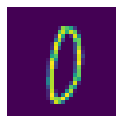

In [ ]:
test_random_sample()

Predicting on image sample 50 from test data
Prediction : 0
Actual : 0


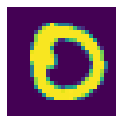

In [ ]:
test_random_sample()

Predicting on image sample 19 from test data
Prediction : 1
Actual : 1


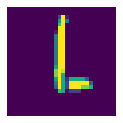

In [ ]:
test_random_sample()

Predicting on image sample 4 from test data
Prediction : 1
Actual : 1


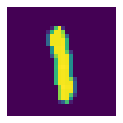

In [ ]:
test_random_sample()




### Visualizing layer outputs


- To get a better understanding of what each layer does to the input image and what it's individual output looks like,

- we create a function to pass a random test image through our trained network and

- plot the image when its passed through the Convolutional, MaxPool and ReLU Layers of our network.



In [ ]:
def layer_outputs(network, input):
    #Initialize the output
    output = input
    #Intitialize the layer number
    layer_n = 0
    #Iterate through layers in our network
    for layer in network:
        #Since we need only the Conv., MaxPool and ReLU layers, we specify layer_number<=3
        if layer_n <= 3:
            #Plot the image using plt.imshow(), drop the first dimension of our image
            #since we do not need for plotting the image
            plt.imshow(output[0,:,:])
            #Turning off the axis (not necessary)
            plt.axis('off')

        #Compute the output of the current layer
        output = layer.forward(output)
        #Incremenet the layer number on every iteration
        layer_n = layer_n + 1
        plt.show()

Plot displaying Layer outputs in the order:

**Input Image => Convolutional output => ReLU output => MaxPool output**

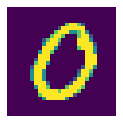

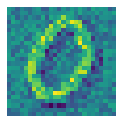

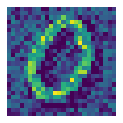

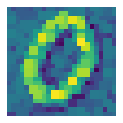

In [ ]:
sample_index = random.randint(0, 2115)
x_sample, y_sample = x_test[sample_index], y_test[sample_index]
layer_outputs(network, x_sample)

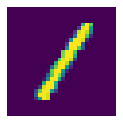

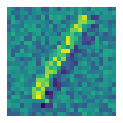

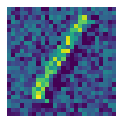

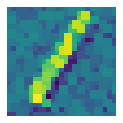

In [ ]:
sample_index = random.randint(0, 2115)
x_sample, y_sample = x_test[sample_index], y_test[sample_index]
layer_outputs(network, x_sample)
#Input Image => Convolutional output => ReLU output => MaxPool output

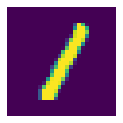

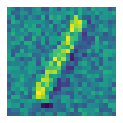

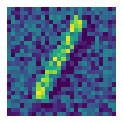

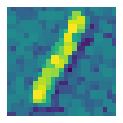

In [ ]:
sample_index = random.randint(0, 2115)
x_sample, y_sample = x_test[sample_index], y_test[sample_index]
layer_outputs(network, x_sample)
#Input Image => Convolutional output => ReLU output => MaxPool output




### Layer output dimensions



We create a function to visualize how our network changes the dimensions of our input image (1x28x28) when passed through every layer.




In [ ]:
def layer_shape(network, input):
    output = input
    #Performing forward pass to our network through every consecutive layer
    for layer in network:
        #Pass the image to every layer's forward method
        output = layer.forward(output)
        #Print layer name
        print(layer)
        #Print layer shape
        print(output.shape)

    #Locating the index in our output class probabilities with the highest value
    #to get the class label
    return output.argmax()

**Input (1x28x28) => Convolution (5 x 3x3 kernels shape) => Output (5, 26, 26) => ReLU => MaxPool (5 x 2x2 kernels shape) => Output (5, 25, 25)=> Reshape (input = 5x25x25) => Output (3125x1) => Dense (input = 3125,1) (output = 100) => TanH => Dense (input = 2, output = 1) => Softmax => predicted class probabilities)**

In [ ]:
print(np.argmax(y_sample))
layer_shape(network, x_sample)

## EXERCISE:
- Write the class for sigmoid activation function and define function for forward & backward propagation and retrain the model with sigmoid activation(replace softmax) in the output layer